![SegmentLocal](Images_StudIP/Logo2.png)

*Behavioral Data*


# Chapter 2.2: Statistical Analysis of behavioral data

<div class="alert alert-block alert-warning">
Make sure that you also downloaded the current version of the folder <b>Jupyter Notebooks ACC/Images_StudIP</b>, otherwise some of the descriptions will be incomplete.
</div>

In [1]:
import numpy as np
import pandas as pd
import researchpy as rp
import statsmodels.api as sm
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.anova import AnovaRM

### Loading the preprocessed behavioral dataset


In [2]:
# Load behavioral dataset
df = pd.read_csv("behavioral_data_preprocessed.csv")

In [3]:
# Take a look at the head of the data frame
df.head()

,subject_ID,target,position,answer_position,time,answer,feedback,trial,condition,block,change,group,task
0,0,46,2,2,1.295453,1,0.00,1,comp,1,15.0,434,player_ori
1,0,29,1,2,1.185209,0,0.00,2,comp,1,15.0,434,player_ori
2,0,48,0,0,0.729091,1,0.05,3,comp,1,15.0,434,player_ori
3,0,120,3,3,1.206738,1,0.00,4,comp,1,15.0,434,player_ori
4,0,48,0,2,1.282198,0,-0.05,5,comp,1,15.0,434,player_ori


In [41]:
# For all statistical tests we assume alpha = 0.05
alpha = 0.05

# TODO: Filter for competitive trials
df_comp = df[df['condition'] == 'comp']

# TODO: Calculate the mean response times per subject per task
rt_task = df_comp.groupby(['subject_ID','task'], as_index = False)['time'].mean()

# TODO: Create 2 dataframes, one for the data of the orientation discrimination task,
#       one for the data of the spatial discrimination task
rt_task_ori = rt_task[rt_task['task'] == 'player_ori']
rt_task_spa = rt_task[rt_task['task'] == 'player_spatial']

### Student's T-value

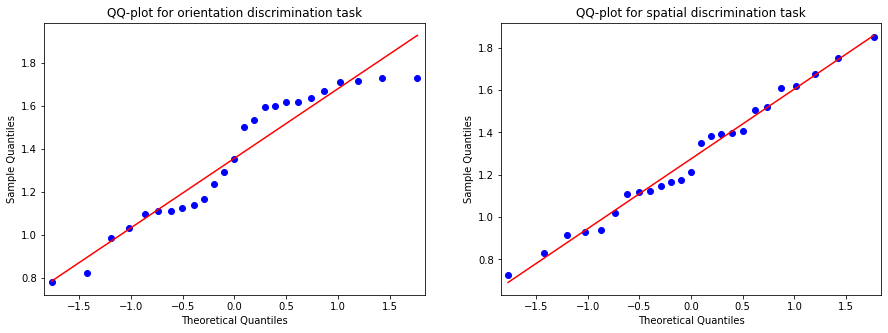

stat_o=0.903, p_o=0.022
Probably not Gaussian
stat_s=0.977, p_s=0.823
Probably Gaussian


In [69]:
# TODO: Create QQ-plots for the response times
fig, axes = plt.subplots(1, 2, figsize = (15,5))
sm.qqplot(rt_task_ori['time'], line = 'r', ax = axes[0])
sm.qqplot(rt_task_spa['time'], line = 'r', ax = axes[1])
axes[0].set(title = 'QQ-plot for orientation discrimination task')
axes[1].set(title = 'QQ-plot for spatial discrimination task')

plt.show()

# TODO: Perform Shapiro-Wilk normality tests
    
stat_o, p_o = stats.shapiro(rt_task_ori['time'])

print('stat_o={:0.3f}, p_o={:0.3f}'.format(stat_o, p_o))
if p_o > alpha:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
    
stat_s, p_s = stats.shapiro(rt_task_spa['time'])

print('stat_s={:0.3f}, p_s={:0.3f}'.format(stat_s, p_s))
if p_s > alpha:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


In [72]:
# TODO: Perform a Levene’s test for homogeneity of variance
test_statistic, p_value = stats.levene(rt_task_ori['time'], rt_task_spa['time'])

print('test statistic is {:0.3f}, p-value is {:0.3f}'.format(test_statistic, p_value))
if p_value > alpha:
    print('it seems all samples come from populations with equal variances')
else:
    print("it doesn't seem all samples come from populations with equal variances")

test statistic is 0.206, p-value is 0.652
it seems all samples come from populations with equal variances


In [75]:
# TODO: Perform a student's t-test
ttest = rp.ttest(rt_task_ori['time'], rt_task_spa['time'])

In [76]:
# TODO: Print the summary statistics
ttest[0]

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,time,25.0,1.355600,0.303658,0.060732,1.230256,1.480944
1,time,25.0,1.274744,0.300876,0.060175,1.150548,1.398939
2,combined,50.0,1.315172,0.301944,0.042701,1.229360,1.400984


In [77]:
# TODO: Print the test results
ttest[1]

,Independent t-test,results
0,Difference (time - time) =,0.0809
1,Degrees of freedom =,48.0000
2,t =,0.9457
3,Two side test p value =,0.3490
4,Difference < 0 p value =,0.8255
5,Difference > 0 p value =,0.1745
6,Cohen's d =,0.2675
7,Hedge's g =,0.2633
8,Glass's delta =,0.2663
9,r =,0.1353


### Two-way repeated measures ANOVA


In [89]:
# For all statistical tests we assume alpha = 0.05
alpha = 0.05

# TODO: Filter for spatial discrimination tasks
player_spatial = df[df['task'] == 'player_spatial']

# TODO: Calculate the mean response times per subject, answer and condition
spatial_sorted = player_spatial.groupby(['subject_ID', 'answer', 'condition'], as_index = False)['time'].mean()
print(spatial_sorted)


    subject_ID  answer condition      time
0           25       0      comp  1.511960
1           25       0      coop  1.542155
2           25       1      comp  1.112387
3           25       1      coop  1.152606
4           26       0      comp  1.372130
..         ...     ...       ...       ...
95          48       1      coop  1.360336
96          49       0      comp  1.355175
97          49       0      coop  1.446672
98          49       1      comp  1.347699
99          49       1      coop  1.400925

[100 rows x 4 columns]


In [117]:
# TODO: Create 4 dataframes (competitive-correct, competitive-incorrect, 
#                            cooperative-correct, cooperative-incorrect)
comp_cor = spatial_sorted[(spatial_sorted['condition'] == 'comp') & (spatial_sorted['answer'] == 1)]
comp_inc = spatial_sorted[(spatial_sorted['condition'] == 'comp') & (spatial_sorted['answer'] == 0)]
coop_cor = spatial_sorted[(spatial_sorted['condition'] == 'coop') & (spatial_sorted['answer'] == 1)]
coop_inc = spatial_sorted[(spatial_sorted['condition'] == 'coop') & (spatial_sorted['answer'] == 0)]

# TODO: Perform a Shapiro-Wilk normality test for each group
groups = [comp_cor['time'], comp_inc['time'], coop_cor['time'], coop_inc['time']]
names = ['comp_cor', 'comp_cor', 'comp_cor', 'comp_cor']

for i in range(len(groups)):
    st, p = stats.shapiro(groups[i])
    print('{}: stat: {:0.3f}, p: {:0.3f}.'.format(names[i], s, p))
    if p > alpha:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian') 

AttributeError: 'numpy.float64' object has no attribute 'shapiro'

In [119]:
# TODO: Extract the response times
cpc = comp_cor['time'].to_numpy()
cpi = comp_inc['time'].to_numpy()
coc = coop_cor['time'].to_numpy()
coi = comp_inc['time'].to_numpy()

# TODO: Calculate the differences between all combinations and test it via Levene's test
stat, p = stats.levene(cpc-cpi, cpc-coc, cpc-coi, cpi-coc, cpi-coi, coc-coi)
print('statistic: {:0.3f}, p-value: {:0.3f}'.format(stat, p))

if p > alpha:
    print('Sphericity is probably given')
else:
    print('Sphericity is probably not given')

AttributeError: 'numpy.float64' object has no attribute 'levene'

In [130]:
# TODO: Perform a two-way repeated measures ANOVA (Pr > F = p-value)
aovrm = AnovaRM(spatial_sorted,'time', 'subject_ID', within=['condition', 'answer'], aggregate_func = 'mean')
fit = aovrm.fit()
fit.summary()


,F Value,Num DF,Den DF,Pr > F
condition,0.4458,1.0000,24.0000,0.5107
answer,21.9021,1.0000,24.0000,0.0001
condition:answer,0.4383,1.0000,24.0000,0.5142


## Citations

- Czeszumski A, Ehinger B, Wahn B, and König P (2019) The social situation affects how we process feedback about our actions. Frontiers in Psychology, 10:361. https://doi.org/10.3389/fpsyg.2019.00361